In [1]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import math as mt
import matplotlib.pyplot as plt

2.6.0


In [2]:
StartingValues=np.load('DiscretizedCurve10TrainingsetUnivariate.npy')
print(StartingValues.shape)

(10000000, 10)


Now calculate the outputs...

In [3]:
Y=np.load('outputsUniVariate.npy')
print(Y.shape)

(10000000,)


In [4]:
import os
os.getcwd()

'/home/jovyan/work/notebooks'

In [5]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Lambda
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras import initializers
from tensorflow.keras.layers import Input, Add
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K


inputs =  tf.keras.Input(shape=(10,))

#nodeHiddenLayer=250

models = []
for nodeHiddenLayer in range(5,155,5):
    layer = Dense(nodeHiddenLayer, activation='relu',trainable=True,
                      kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
                      bias_initializer='random_normal')

    outlayer=Dense(1, activation=None,trainable=True,
                      kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
                      use_bias=False)
    
    tmp=layer(inputs)
    finalOutput=outlayer(tmp)
                              
    model = Model(inputs=inputs, outputs=finalOutput)

    model.compile(optimizer='adam',loss='mean_squared_error')
    models=models+[model]

models[0].summary()
models[29].summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 55        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_58 (Dense)             (None, 150)               1650      
_______________________________________________

In [6]:
import time
for k in range(0,len(models),1):
    tic = time.perf_counter()
    models[k].fit(StartingValues, Y, epochs=50, batch_size=10000)
    toc = time.perf_counter()
    print(k)
    print(f"Calc time: {(toc - tic)/60.0:0.4f} minutes")

2022-02-15 01:23:52.598155: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
1000/1000 [==============================] - 6s 5ms/step - loss: 2.0706
Epoch 2/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0836
Epoch 3/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0719
Epoch 4/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0682
Epoch 5/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0662
Epoch 6/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0651
Epoch 7/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0646
Epoch 8/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0644
Epoch 9/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0644
Epoch 10/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0644
Epoch 11/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0644
Epoch 12/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0643
E

1000/1000 [==============================] - 6s 6ms/step - loss: 0.0662
Epoch 46/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0662
Epoch 47/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0662
Epoch 48/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0662
Epoch 49/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0662
Epoch 50/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0662
3
Calc time: 4.9638 minutes
Epoch 1/50
1000/1000 [==============================] - 8s 7ms/step - loss: 0.7021
Epoch 2/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0719
Epoch 3/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0711
Epoch 4/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0702
Epoch 5/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0691
Epoch 6/50
1000/1000 [==============================] - 7s 7ms/st

1000/1000 [==============================] - 8s 8ms/step - loss: 0.0663
Epoch 40/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0663
Epoch 41/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0663
Epoch 42/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0663
Epoch 43/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0663
Epoch 44/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0663
Epoch 45/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0662
Epoch 46/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0662
Epoch 47/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0663
Epoch 48/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0663
Epoch 49/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0663
Epoch 50/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0662
7
Ca

1000/1000 [==============================] - 9s 9ms/step - loss: 0.0645
Epoch 34/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0645
Epoch 35/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0645
Epoch 36/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0645
Epoch 37/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0645
Epoch 38/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0646
Epoch 39/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0645
Epoch 40/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0645
Epoch 41/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0645
Epoch 42/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0645
Epoch 43/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0645
Epoch 44/50
1000/1000 [==============================] - 9s 9ms/step - loss: 0.0645
Epoc

Epoch 23/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0665
Epoch 24/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0665
Epoch 25/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0665
Epoch 26/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0665
Epoch 27/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0664
Epoch 28/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0665
Epoch 29/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0665
Epoch 30/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0665
Epoch 31/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0665
Epoch 32/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0665
Epoch 33/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0665
Epoch 34/50
1000/1000 [==============================]

1000/1000 [==============================] - 12s 12ms/step - loss: 0.0666
Epoch 12/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0666
Epoch 13/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0666
Epoch 14/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0666
Epoch 15/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0666
Epoch 16/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0666
Epoch 17/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0666
Epoch 18/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0666
Epoch 19/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0666
Epoch 20/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0666
Epoch 21/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0666
Epoch 22/50
1000/1000 [==============================] - 12s 12ms/

1000/1000 [==============================] - 13s 13ms/step - loss: 0.0666
22
Calc time: 10.9267 minutes
Epoch 1/50
1000/1000 [==============================] - 15s 14ms/step - loss: 35.2209
Epoch 2/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.1780
Epoch 3/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0814
Epoch 4/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0707
Epoch 5/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0679
Epoch 6/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0667
Epoch 7/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0666
Epoch 8/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0664
Epoch 9/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0662
Epoch 10/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0662
Epoch 11/50
1000/1000 [=====================

1000/1000 [==============================] - 14s 14ms/step - loss: 0.0667
Epoch 39/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0668
Epoch 40/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0667
Epoch 41/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0667
Epoch 42/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0666
Epoch 43/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0668
Epoch 44/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0667
Epoch 45/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0667
Epoch 46/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0667
Epoch 47/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0667
Epoch 48/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0666
Epoch 49/50
1000/1000 [==============================] - 14s 14ms/

In [12]:
MCpricesTestset=np.load('outputsUniVariateTestset100000Simulations.npy')
xvaluesTestset=np.load('DiscretizedCurve10TestsetUnivariate.npy')
print(xvaluesTestset[0])
print(MCpricesTestset)

[1.53911892 1.54385504 1.54851292 1.55309372 1.55759859 1.5620287
 1.5663852  1.57066924 1.57488198 1.57902457]
[0.58293156 0.01456165 0.08100988 ... 0.09464409 0.03461939 0.55430981]


[3.80978781e-05 2.88763345e-04 1.98881351e-03 1.92883948e-03
 1.94636628e-03 1.95302488e-03 1.96668599e-03 2.36700545e-03
 1.92779582e-03 4.03263111e-04 2.00437359e-03 1.73489942e-04
 1.38510630e-04 9.66196880e-04 2.37241597e-03 1.97942369e-03
 1.01492071e-04 5.53533791e-05 2.67367723e-04 8.65615584e-05
 1.70771906e-04 9.89412307e-04 1.93327165e-03 4.29336308e-03
 1.99012327e-04 1.29645050e-04 2.25336407e-03 1.11572887e-03
 1.02265818e-04 1.95324654e-03]


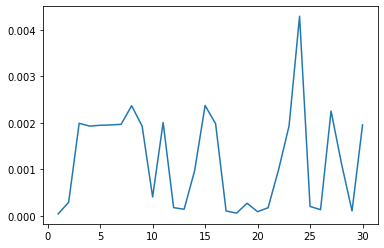

In [13]:
mctf=tf.reshape(tf.constant(MCpricesTestset),[MCpricesTestset.shape[0],1])
mctf=tf.dtypes.cast(mctf, tf.float32)
mse = tf.keras.losses.MeanSquaredError()
mses=np.zeros(30)
for k in range(0,30,1):
    predictions=models[k](xvaluesTestset)
    mses[k]=mse(predictions, mctf).numpy()
print(mses)
xvalues=range(1,31,1)
plt.plot(xvalues,mses)
plt.show()

In [14]:
np.save('msePointBasedUnivariate10discretized',mses)

In [15]:
predictionTest=model(xvaluesTestset)
mctf=tf.reshape(tf.constant(MCpricesTestset),[MCpricesTestset.shape[0],1])
mctf=tf.dtypes.cast(mctf, tf.float32)
mse = tf.keras.losses.MeanSquaredError()
mse(predictionTest, mctf).numpy()

0.0019532465